# Building a Baseline Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read dataset
df = pd.read_csv('Basquiat_Dataset.csv')

In [3]:
# Rename hammer price to be more descriptive of data
df.rename(columns={'Hammer Price':'Hammer Price (USD in millions)'},inplace=True)

In [4]:
# Convert hammer price to more manageable variables
df['Hammer Price (USD in millions)']= df['Hammer Price (USD in millions)'].map(lambda x:x/1000000)

In [6]:
# Drop unnecessary columns 
df.drop(['Title','Length (in)','Width (in)','Seller Country','Month'],axis=1,inplace=True)

In [9]:
#Converting our categorial variables 
art_type = pd.get_dummies(df['Type'],drop_first=True)
primary_medium = pd.get_dummies(df['Primary Medium'],drop_first=True)
size = pd.get_dummies(df['Size'],drop_first=True)
seller = pd.get_dummies(df['Seller '],drop_first=True)
seller_city = pd.get_dummies(df['Seller City'],drop_first=True)

In [10]:
# Add dummy variables to dataframe 
df = pd.concat([df,art_type,primary_medium,size,seller,seller_city],axis=1)

In [19]:
# Drop converted columns 
df.drop(['Type','Primary Medium','Size','Seller ','Seller City'],axis=1,inplace=True)

In [20]:
df.head()

,Year Created,Area (in),Hammer Price (USD in millions),Year Sold,Unique Colors,Contrast Score,Brightness Score,Painting,Colored Pencils,Felt tip,...,Pencil,Wax Crayon,Medium,Small,Other,Sotheby's,London,New York City,Paris,Shanghai
0,1982,4896,98.000,2017,462137,36.51,117.47,1,0,0,...,0,0,1,0,0,1,0,1,0,0
1,1983,5621,81.000,2021,374696,19.60,137.63,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1982,18518,73.869,2022,367901,20.81,127.06,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,1982,4536,44.000,2021,327100,31.42,142.12,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4,1982,6048,43.500,2013,592217,44.29,96.69,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df.drop('Hammer Price (USD in millions)',axis=1), 
                                                    df['Hammer Price (USD in millions)'], test_size=0.30)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
# Standardize data
scaler.fit(X_train)

StandardScaler()

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [28]:
# Train model
lm.fit(X_train,y_train)

LinearRegression()

In [29]:
# Test model
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

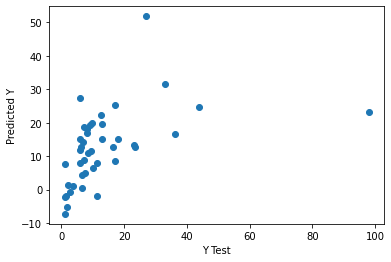

In [30]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [31]:
from sklearn import metrics

In [32]:
# Baseline Results
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9.00662940826507
MSE: 217.58863280118393
RMSE: 14.750885831067365
